<a href="https://colab.research.google.com/github/LimYeongJun/LimYeongJun/blob/master/Ch_04_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch.04 신경망 학습

### 손실함수 : 신경망이 학습할 수 있도록 해주는 지표

* 퍼셉트론에서는 매개변수가 매우 적어서 사람이 수작업으로 매개변수 값을 설정. <br> 하지만 실제 신경망에서는 매개변수가 매우 많기 때문에(수천~수만) 이번 장에서는 신경망 학습에 대해서 설명하고, 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현하는 데 목적이 있음

## 4.1.1 데이터 주도학습

* 사람의 직관 vs 기계학습

* 사람의 경험과 직관을 단서로 시행착오를 거듭하며 일을 진행할 수도 있지만, 기계학습에서는 사람의 개입을 최소화.

예를 들면, 5라는 숫자를 인식하는 프로그램을 구현할 때 글씨체가 다르더라도 인간의 직관으로 5를 구별할 수 있지만,<br>기계학습으로 알고리즘을 짜는 일은 매우 힘들다.

--> 주어진 데이터를 잘 활용해서 해결해야 함. 그 방법으로 **특징**을 추출하고, 그 특징의 패턴을 기계학습 기술로 학습함.

** 이미지의 특징은 주로 벡터로 기술. 여기서 중요한점은 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 **사람**이 담당함.






## 4.2 손실함수(loss function)

- 손실함수 : 신경망 학습에서 사용하는 지표. 임의의 함수를 사용할 수도 있지만 일반적으로는 평균 제곱 오차와 교차 엔트로피 오차를 사용

In [0]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

mean_squared_error(np.array(y), np.array(t))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))





0.5975

위에서 본 것과 같이 정답은 2이고, 신경망의 출력이 2에서 가장 높은 경우 오차가 가장 적으므로 정답에 더 가까움.

- 교차 엔트로피 오차(cross entropy error)
$$E = -\sum_{k}^{} {t}_{k}log{y}_{k}$$
이때, log는 자연로그


C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


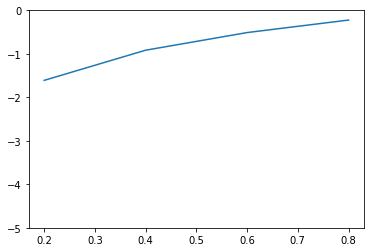

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.2)
plt.ylim(-5.0, 0.0)
y = np.log(x)
plt.plot(x,y)
plt.show()

In [0]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 4.2.3 미니배치 학습

지금까지 데이터 하나에 대한 손실 함수만 생각했지만, 이제 훈련 데이터 모두에 대한 손실함수의 합을 구하는 방법을 생각해보자.

교차 엔트로피 식 : $$E = -\frac{1}{N}\sum_{n}^{}\sum_{k}^{}{t}_{nk}log{y}_{nk}$$
데이터 1개에 대한 손실함수 식을 단순히 N 개의 데이터로 확장시킴. 그 후 N으로 나누어 평균손실함수를 구함<br>
데이터의 갯수가 매우 많아지면 **미니배치** 방법을 사용<br>
**미니배치(mini-batch) : 데이터 일부를 추려 전체의 근사치로 이용하는 방법**

In [0]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000, 10)


(60000, 784)
(60000, 10)


array([ 5548, 56156,  2364,   444,  8302, 15578, 36231, 29989, 22243,
        2267])

이 결과는 책과 다르다. 무작위로 10개를 뽑았기 때문에, Out을 출력할 때 마다 바뀐다.

### 4.2.4 (배치용)교차 엔트로피 오차 구현하기

In [0]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + 1e-7)) / batch_size
    


y는 신경망의 출력, t는 정답 레이블<br>
정답 레이블이 원-핫 인코딩이 아니라 2나 7같은 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구현한다.

In [0]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

**이 구현에서는 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심**